In [1]:
# Recurrent Neural Network

# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the training set
training_set = pd.read_csv('data/SP500/tickers/GOOG.csv')

In [2]:
training_set.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-10-01,437.280914,440.966949,437.181549,440.634094,440.634094,3391400
1,2013-10-02,438.512909,441.806488,436.073761,441.125916,441.125916,3009900
2,2013-10-03,441.130859,444.161163,433.232239,435.214355,435.214355,4261500
3,2013-10-04,434.672882,435.919769,432.189026,433.356445,433.356445,2733600
4,2013-10-07,430.922272,434.171143,429.263062,430.072784,430.072784,2603900


In [3]:
training_set = training_set.iloc[:,5:6].values

In [4]:
training_set[:5]

array([[ 440.634094],
       [ 441.125916],
       [ 435.214355],
       [ 433.356445],
       [ 430.072784]])

In [5]:
training_set.shape

(1239, 1)

In [6]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)

# Getting the inputs and the ouputs
X_train = training_set[0:1238]
y_train = training_set[1:1239]

# Reshaping
X_train = np.reshape(X_train, (1238, 1, 1))

In [7]:
X_train.shape

(1238, 1, 1)

In [8]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()

# Adding the input layer and the LSTM layer
regressor.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None, 1)))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

Using TensorFlow backend.


In [9]:
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, batch_size = 32, epochs = 250)

Epoch 1/250
1238/1238 [==============================] - 0s - loss: 0.0651     
Epoch 2/250
1238/1238 [==============================] - 0s - loss: 0.0630     
Epoch 3/250
1238/1238 [==============================] - 0s - loss: 0.0617     
Epoch 4/250
1238/1238 [==============================] - 0s - loss: 0.0602     
Epoch 5/250
1238/1238 [==============================] - 0s - loss: 0.0589     
Epoch 6/250
1238/1238 [==============================] - 0s - loss: 0.0574     
Epoch 7/250
1238/1238 [==============================] - 0s - loss: 0.0560     
Epoch 8/250
1238/1238 [==============================] - 0s - loss: 0.0544     
Epoch 9/250
1238/1238 [==============================] - 0s - loss: 0.0530     
Epoch 10/250
1238/1238 [==============================] - 0s - loss: 0.0513     
Epoch 11/250
1238/1238 [==============================] - 0s - loss: 0.0497     
Epoch 12/250
1238/1238 [==============================] - 0s - loss: 0.0480     - ETA: 0s - loss: 0.04
Epoch 13/250
12

1238/1238 [==============================] - 0s - loss: 1.6595e-04     
Epoch 99/250
1238/1238 [==============================] - 0s - loss: 1.6736e-04     
Epoch 100/250
1238/1238 [==============================] - 0s - loss: 1.6498e-04     
Epoch 101/250
1238/1238 [==============================] - 0s - loss: 1.6505e-04     
Epoch 102/250
1238/1238 [==============================] - 0s - loss: 1.6526e-04     
Epoch 103/250
1238/1238 [==============================] - 0s - loss: 1.6610e-04     
Epoch 104/250
1238/1238 [==============================] - 0s - loss: 1.6576e-04     
Epoch 105/250
1238/1238 [==============================] - 0s - loss: 1.6715e-04     
Epoch 106/250
1238/1238 [==============================] - 0s - loss: 1.6586e-04     
Epoch 107/250
1238/1238 [==============================] - 0s - loss: 1.6520e-04     
Epoch 108/250
1238/1238 [==============================] - 0s - loss: 1.6598e-04     
Epoch 109/250
1238/1238 [==============================] - 0s - loss:

1238/1238 [==============================] - 0s - loss: 1.6538e-04     
Epoch 194/250
1238/1238 [==============================] - 0s - loss: 1.6743e-04     
Epoch 195/250
1238/1238 [==============================] - 0s - loss: 1.6504e-04     
Epoch 196/250
1238/1238 [==============================] - 0s - loss: 1.6774e-04     
Epoch 197/250
1238/1238 [==============================] - 0s - loss: 1.6536e-04     
Epoch 198/250
1238/1238 [==============================] - 0s - loss: 1.6507e-04     
Epoch 199/250
1238/1238 [==============================] - 0s - loss: 1.6424e-04     
Epoch 200/250
1238/1238 [==============================] - 0s - loss: 1.6463e-04     
Epoch 201/250
1238/1238 [==============================] - 0s - loss: 1.6598e-04     
Epoch 202/250
1238/1238 [==============================] - 0s - loss: 1.6607e-04     
Epoch 203/250
1238/1238 [==============================] - 0s - loss: 1.6449e-04     
Epoch 204/250
1238/1238 [==============================] - 0s - loss

In [10]:
test_set = pd.read_csv('data/SP500/symbols/GOOG_test.csv')
test_set.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-09-04,1204.270020,1212.989990,1192.500000,1197.000000,1197.000000,1831000
1,2018-09-05,1193.800049,1199.010010,1162.000000,1186.479980,1186.479980,2061300
2,2018-09-06,1186.300049,1186.300049,1152.000000,1171.439941,1171.439941,1888500
3,2018-09-07,1158.670044,1175.260010,1157.214966,1164.829956,1164.829956,1401300
4,2018-09-10,1172.189941,1174.540039,1160.109985,1164.640015,1164.640015,1115400


In [11]:
test_set.shape

(19, 7)

In [12]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2018

real_stock_price = test_set.iloc[:,5:6].values
real_stock_price 

array([[ 1197.      ],
       [ 1186.47998 ],
       [ 1171.439941],
       [ 1164.829956],
       [ 1164.640015],
       [ 1177.359985],
       [ 1162.819946],
       [ 1175.329956],
       [ 1172.530029],
       [ 1156.050049],
       [ 1161.219971],
       [ 1171.089966],
       [ 1186.869995],
       [ 1166.089966],
       [ 1173.369995],
       [ 1184.650024],
       [ 1180.48999 ],
       [ 1194.640015],
       [ 1193.469971]])

In [13]:
# Getting the predicted stock price of 2018
inputs = real_stock_price
inputs

array([[ 1197.      ],
       [ 1186.47998 ],
       [ 1171.439941],
       [ 1164.829956],
       [ 1164.640015],
       [ 1177.359985],
       [ 1162.819946],
       [ 1175.329956],
       [ 1172.530029],
       [ 1156.050049],
       [ 1161.219971],
       [ 1171.089966],
       [ 1186.869995],
       [ 1166.089966],
       [ 1173.369995],
       [ 1184.650024],
       [ 1180.48999 ],
       [ 1194.640015],
       [ 1193.469971]])

In [14]:
inputs = sc.transform(inputs)
inputs

array([[ 0.91551118],
       [ 0.90305044],
       [ 0.88523583],
       [ 0.87740644],
       [ 0.87718146],
       [ 0.892248  ],
       [ 0.87502563],
       [ 0.88984347],
       [ 0.88652702],
       [ 0.86700683],
       [ 0.87313049],
       [ 0.88482129],
       [ 0.9035124 ],
       [ 0.8788989 ],
       [ 0.88752194],
       [ 0.90088289],
       [ 0.89595542],
       [ 0.91271583],
       [ 0.91132993]])

In [15]:
inputs = np.reshape(inputs, (19, 1, 1))
inputs

array([[[ 0.91551118]],

       [[ 0.90305044]],

       [[ 0.88523583]],

       [[ 0.87740644]],

       [[ 0.87718146]],

       [[ 0.892248  ]],

       [[ 0.87502563]],

       [[ 0.88984347]],

       [[ 0.88652702]],

       [[ 0.86700683]],

       [[ 0.87313049]],

       [[ 0.88482129]],

       [[ 0.9035124 ]],

       [[ 0.8788989 ]],

       [[ 0.88752194]],

       [[ 0.90088289]],

       [[ 0.89595542]],

       [[ 0.91271583]],

       [[ 0.91132993]]])

In [16]:
predicted_stock_price = regressor.predict(inputs)
predicted_stock_price

array([[ 0.91904879],
       [ 0.90663481],
       [ 0.88887477],
       [ 0.88106477],
       [ 0.88084042],
       [ 0.89586723],
       [ 0.87868929],
       [ 0.89346957],
       [ 0.89016247],
       [ 0.87068665],
       [ 0.87679827],
       [ 0.88846123],
       [ 0.90709507],
       [ 0.88255382],
       [ 0.89115453],
       [ 0.90447474],
       [ 0.89956319],
       [ 0.91626453],
       [ 0.91488397]], dtype=float32)

In [17]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
predicted_stock_price

array([[ 1199.98657227],
       [ 1189.50610352],
       [ 1174.51208496],
       [ 1167.91845703],
       [ 1167.72900391],
       [ 1180.41552734],
       [ 1165.91296387],
       [ 1178.39123535],
       [ 1175.59924316],
       [ 1159.15673828],
       [ 1164.31640625],
       [ 1174.16296387],
       [ 1189.89465332],
       [ 1169.17565918],
       [ 1176.43676758],
       [ 1187.68237305],
       [ 1183.5357666 ],
       [ 1197.63598633],
       [ 1196.47045898]], dtype=float32)

In [18]:
real_stock_price

array([[ 1197.      ],
       [ 1186.47998 ],
       [ 1171.439941],
       [ 1164.829956],
       [ 1164.640015],
       [ 1177.359985],
       [ 1162.819946],
       [ 1175.329956],
       [ 1172.530029],
       [ 1156.050049],
       [ 1161.219971],
       [ 1171.089966],
       [ 1186.869995],
       [ 1166.089966],
       [ 1173.369995],
       [ 1184.650024],
       [ 1180.48999 ],
       [ 1194.640015],
       [ 1193.469971]])

In [19]:
predicted_stock_price

array([[ 1199.98657227],
       [ 1189.50610352],
       [ 1174.51208496],
       [ 1167.91845703],
       [ 1167.72900391],
       [ 1180.41552734],
       [ 1165.91296387],
       [ 1178.39123535],
       [ 1175.59924316],
       [ 1159.15673828],
       [ 1164.31640625],
       [ 1174.16296387],
       [ 1189.89465332],
       [ 1169.17565918],
       [ 1176.43676758],
       [ 1187.68237305],
       [ 1183.5357666 ],
       [ 1197.63598633],
       [ 1196.47045898]], dtype=float32)

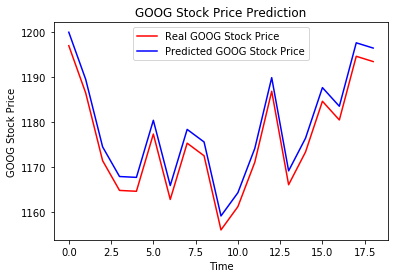

In [20]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real GOOG Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted GOOG Stock Price')
plt.title('GOOG Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('GOOG Stock Price')
plt.legend()
plt.show()

In [21]:
# Part 4 - Evaluating the RNN

import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [22]:
#  Evaluating the RNN
print ("Score")
print('MAE:  %.4F' % (mean_absolute_error(real_stock_price, predicted_stock_price)))
print('RMSE: %.4f  ' % (math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))))

Score
MAE:  3.0563
RMSE: 3.0565  


In [23]:
print('MSE:  %.4f' % (mean_squared_error(real_stock_price, predicted_stock_price)))

MSE:  9.3421


In [24]:
# Getting the real stock price of 2013 - 2018
real_stock_price_train = pd.read_csv('data/SP500/tickers/GOOG.csv')
real_stock_price_train = real_stock_price_train.iloc[:,5:6].values

In [25]:
real_stock_price_train = real_stock_price_train[:1272]

In [26]:
# Getting the predicted stock price of 2013 - 2018
predicted_stock_price_train = regressor.predict(X_train)
predicted_stock_price_train = sc.inverse_transform(predicted_stock_price_train)

In [27]:
print(predicted_stock_price_train.shape)

(1238, 1)


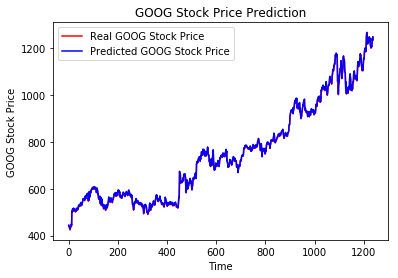

In [28]:
# Visualising the results
plt.plot(real_stock_price_train, color = 'red', label = 'Real GOOG Stock Price')
plt.plot(predicted_stock_price_train, color = 'blue', label = 'Predicted GOOG Stock Price')
plt.title('GOOG Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('GOOG Stock Price')
plt.legend()
plt.show()

In [29]:
real_stock_price_train = real_stock_price_train[:1238]
real_stock_price_train.shape

(1238, 1)

In [31]:
#  Evaluating the RNN
print ("Score")
print('MAE:  %.4F' % (mean_absolute_error(real_stock_price_train, predicted_stock_price_train)))
print('RMSE: %.4f  ' % (math.sqrt(mean_squared_error(real_stock_price_train, predicted_stock_price_train))))

Score
MAE:  2.2077
RMSE: 2.2803  


In [32]:
print('MSE:  %.4f' % (mean_squared_error(real_stock_price_train, predicted_stock_price_train)))

MSE:  5.1998
